<a href="https://colab.research.google.com/github/erfanera/SlumImprovment/blob/main/GraphOperation/House%26roadsIntegration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import matplotlib.pyplot as plt
from skimage import measure
import numpy as np
import requests


from PIL import Image
from io import BytesIO

import cv2
import matplotlib.pyplot as plt
from skimage import measure
import numpy as np
import requests

from PIL import Image
from io import BytesIO

from skimage import data
import matplotlib.pyplot as plt
from skimage.util import invert
from skimage import img_as_bool, img_as_ubyte

from skimage.morphology import skeletonize, dilation, square
import imageio

import networkx as nx

import matplotlib.pyplot as plt

In [3]:
def readGitHubUrl(webAddress):
    img_url = webAddress

    # Get the image from the URL
    response = requests.get(img_url)
    img = Image.open(BytesIO(response.content)).convert('RGB')

    # Convert the image to grayscale
    bw_image = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2GRAY)
    return bw_image

In [4]:

cells = readGitHubUrl("https://raw.githubusercontent.com/erfanera/SlumImprovment/main/Images/building.png")


In [5]:


cells = 255 - cells
_, paths_mask = cv2.threshold(cells, 127, 255, cv2.THRESH_BINARY_INV)

# Morphological operations to clean up noise and enhance path structures
kernel = np.ones((5, 5), np.uint8)  # You can adjust the kernel size as needed
cleaned_paths = cv2.morphologyEx(paths_mask, cv2.MORPH_OPEN, kernel)
ret,thresh = cv2.threshold(cells,100,255,cv2.THRESH_BINARY_INV)


labels= measure.label(thresh, background=0)
bg_label = labels[0,0]
labels[labels==bg_label] = 0 # Assign background label to 0

props = measure.regionprops(labels)
centroids = np.zeros(shape=(len(np.unique(labels)),2)) # Access the coordinates of centroids


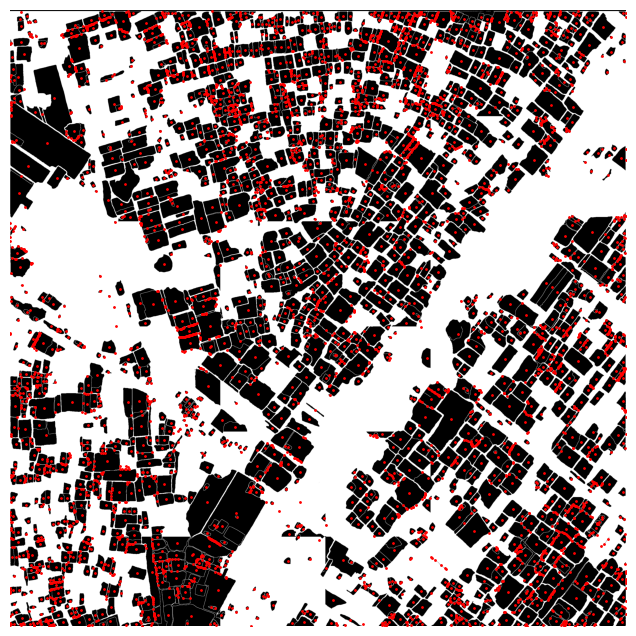

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
#plt.figure(figsize=(20, 20))
plt.axis('off')
ax.imshow(cells,cmap='gray')

for i,prop in enumerate(props):
    my_centroid = prop.centroid
    centroids[i,:]= my_centroid
    ax.plot(my_centroid[1],my_centroid[0],'r.',markersize=2)

plt.show()

In [7]:
len(centroids)

4817

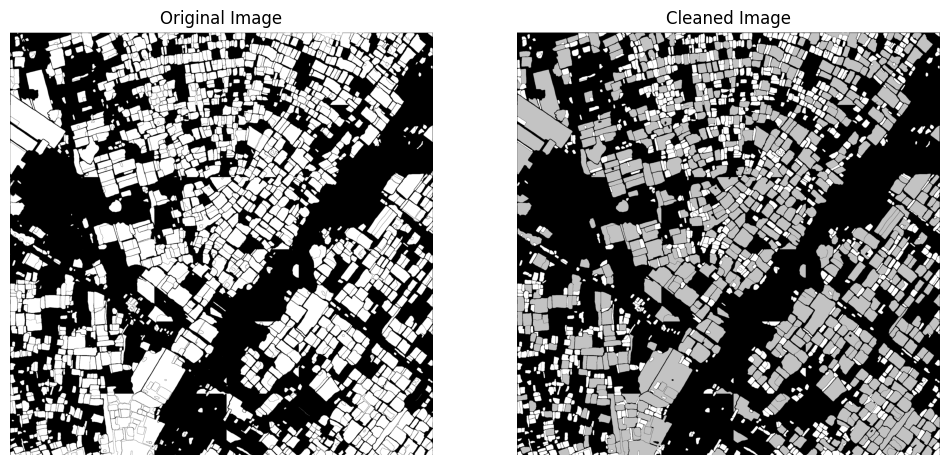

In [8]:

# Read the image and convert to binary

_, paths_mask = cv2.threshold(cells, 127, 255, cv2.THRESH_BINARY_INV)
revert = 255-cells
# Apply morphological operations to clean up noise
kernel = np.ones((5, 5), np.uint8)
cleaned_paths = cv2.morphologyEx(paths_mask, cv2.MORPH_OPEN, kernel)

# Label the connected components
labels = measure.label(cleaned_paths, background=0)
props = measure.regionprops(labels)

# Create a new image to store the cleaned cells, initially set all to background (0)
cleaned_cells = np.zeros_like(cells)

# Loop through all detected regions
for prop in props:
    if prop.area >= 200:  # Keep regions with area >= 20 pixels
        # Add the region to the cleaned_cells image
        if prop.area >=2000 :
          cleaned_cells[labels == prop.label] = 195
        else:
          cleaned_cells[labels == prop.label] = 255

# Display the original and cleaned images for comparison
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(revert, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(cleaned_cells, cmap='gray')
ax[1].set_title('Cleaned Image')
ax[1].axis('off')

plt.show()


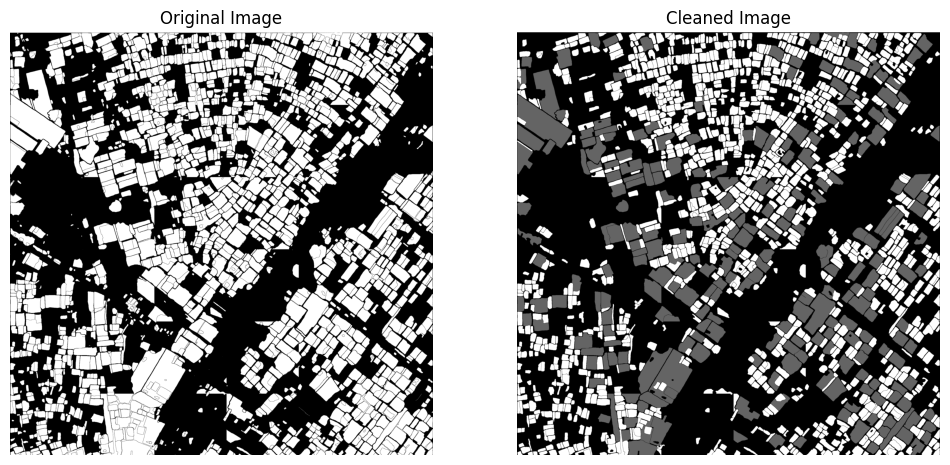

In [10]:
kernel = np.ones((5, 5), np.uint8)
cleaned_paths = cv2.morphologyEx(paths_mask, cv2.MORPH_OPEN, kernel)

# Label the connected components
labels = measure.label(cleaned_paths, background=0)
props = measure.regionprops(labels)

# Create a new image to store the cleaned cells, initially set all to background (0)
cleaned_cells = np.zeros_like(cells)
houseCentroid = []
amenityCentroid = []
# Loop through all detected regions
for prop in props:
    if prop.area >= 600:  # Keep regions with area >= 20 pixels
        center = prop.centroid
        # Add the region to the cleaned_cells image
        if prop.area >=4000 :
          cleaned_cells[labels == prop.label] = 100#[255, 255, 0]
          amenityCentroid.append(center)
        else:
          cleaned_cells[labels == prop.label] = 255
          houseCentroid.append(center)
# Display the original and cleaned images for comparison
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(revert, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(cleaned_cells, cmap='gray')
ax[1].set_title('Cleaned Image')
ax[1].axis('off')

plt.show()

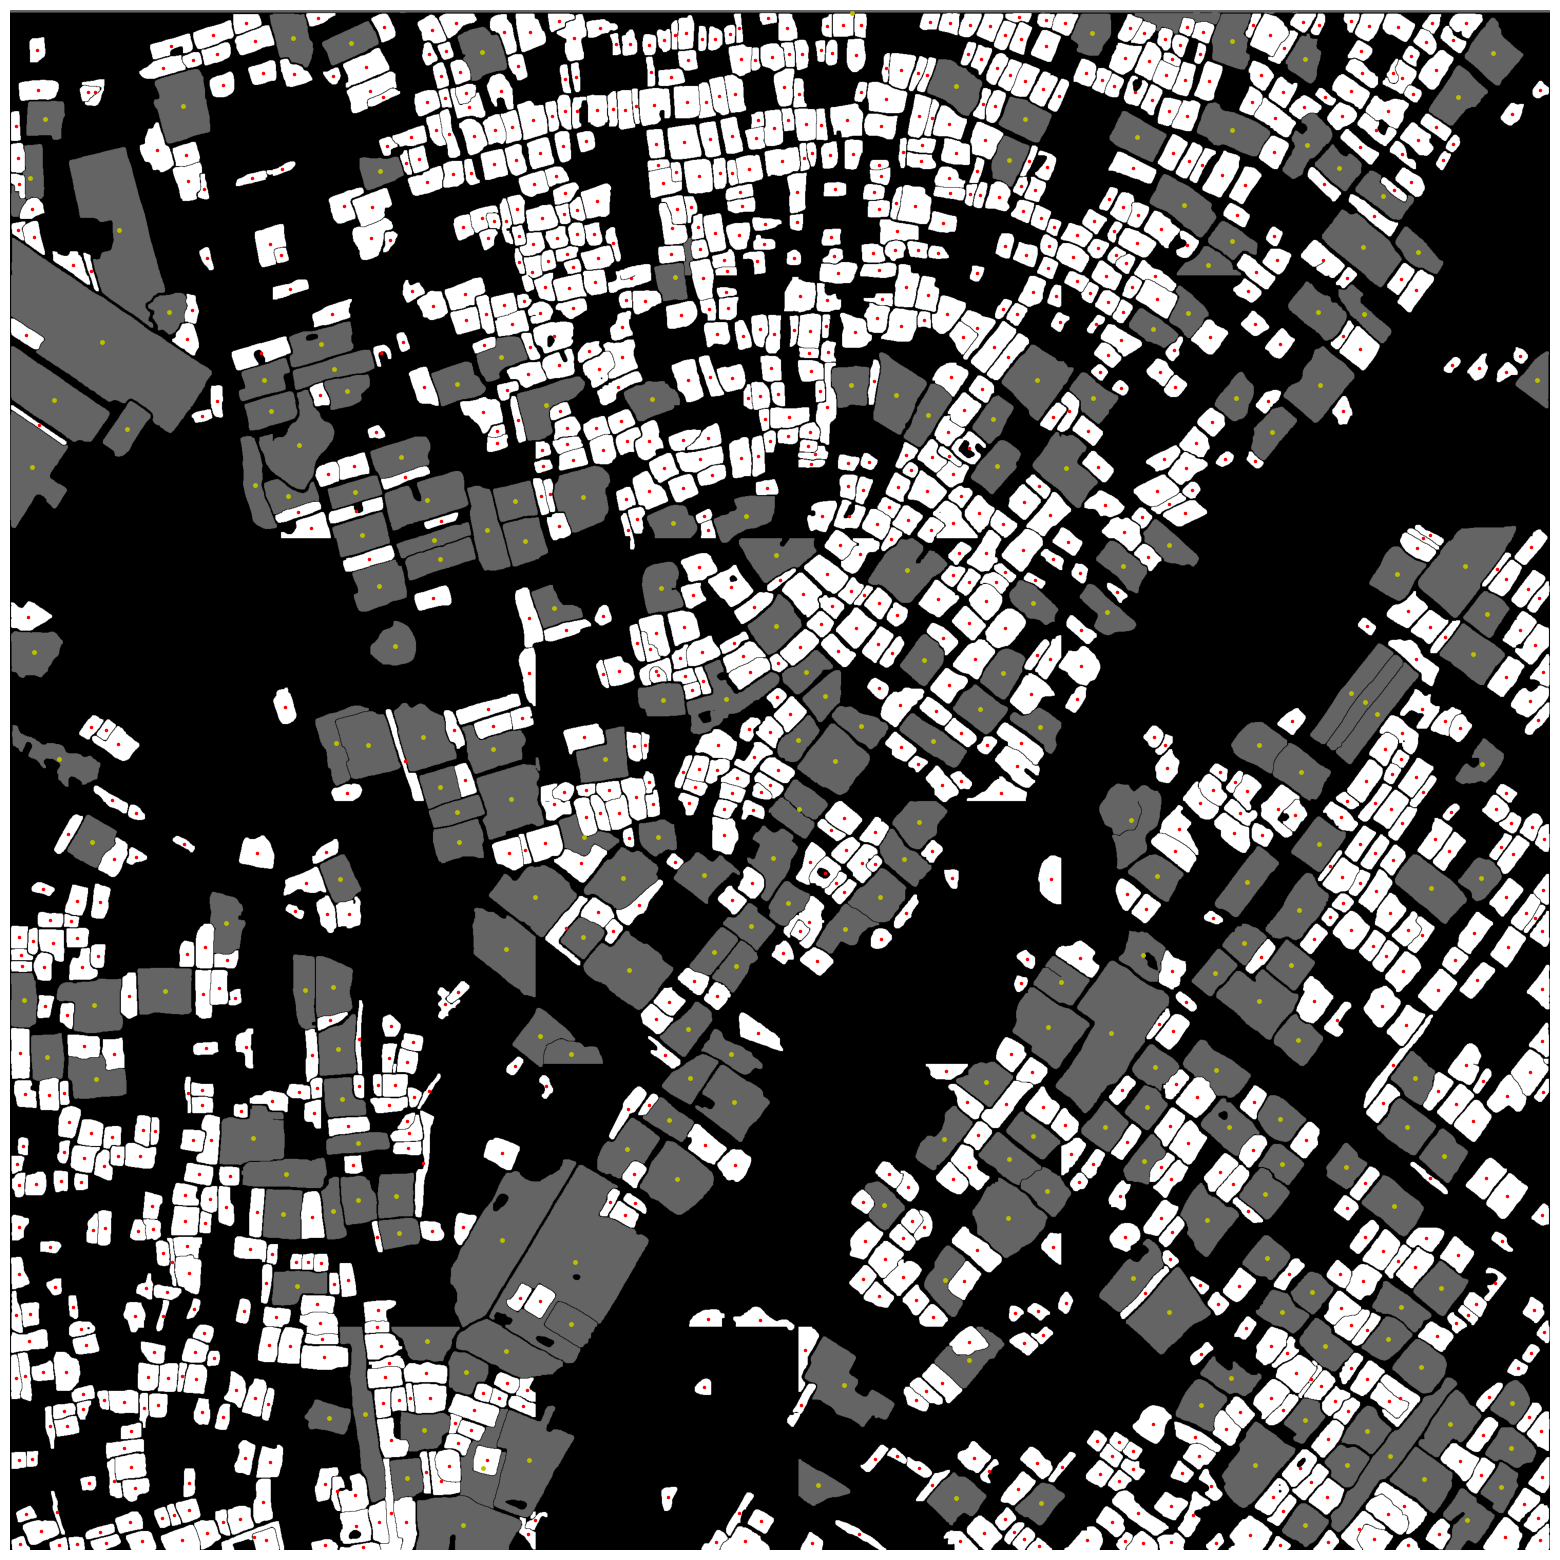

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
#plt.figure(figsize=(20, 20))
plt.axis('off')
ax.imshow(cleaned_cells,cmap='gray')

for i in (houseCentroid):
    #my_centroid = prop.centroid
    #centroids[i,:]= my_centroid
    ax.plot(i[1],i[0],'r.',markersize=3)
for i in (amenityCentroid):
    #my_centroid = prop.centroid
    #centroids[i,:]= my_centroid
    ax.plot(i[1],i[0],'y.',markersize=5  )



plt.show()

# Road Detection

###Importing the image

In [13]:

bw_image = readGitHubUrl("https://raw.githubusercontent.com/erfanera/SlumImprovment/main/Images/Shadows_Cleaned.png")


##Morphological Operation

### Morphological Operartion

In [14]:
_, paths_mask = cv2.threshold(bw_image, 127, 255, cv2.THRESH_BINARY_INV)

# Morphological operations to clean up noise and enhance path structures
kernel = np.ones((5, 5), np.uint8)  # You can adjust the kernel size as needed
cleaned_paths = cv2.morphologyEx(paths_mask, cv2.MORPH_OPEN, kernel)
cleaned_paths = cv2.dilate(cleaned_paths, kernel, iterations=2)  # Increase path width

# Optionally, find contours (which could represent paths)
contours, _ = cv2.findContours(cleaned_paths, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image for visualization
contour_img = cv2.cvtColor(bw_image, cv2.COLOR_GRAY2BGR)  # Convert to BGR to draw colored contours
#cv2.drawContours(contour_img, contours, -1, (0, 255, 0), 2)  # Draw contours in green



### Show the original and processed images

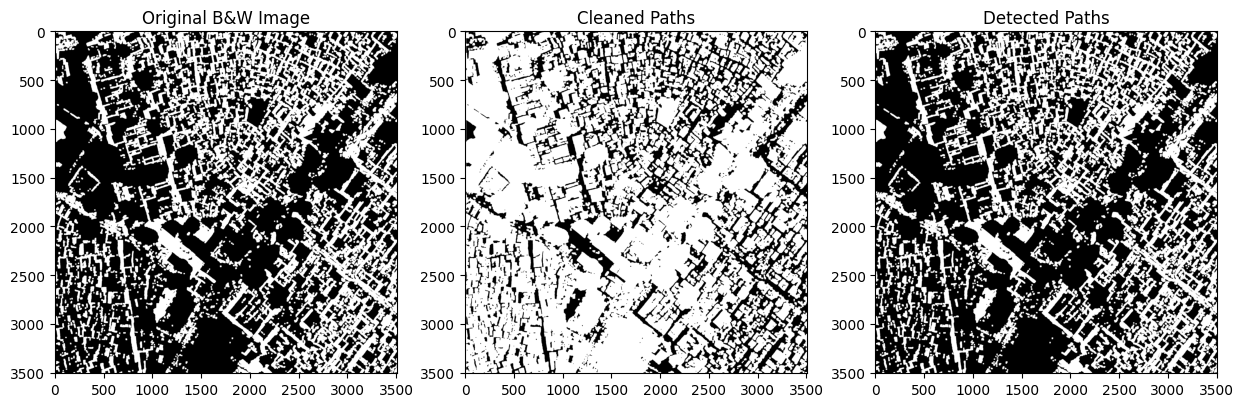

In [15]:

plt.figure(figsize=(15, 10))
plt.subplot(1, 3, 1)
plt.imshow(bw_image, cmap='gray')
plt.title('Original B&W Image')
plt.subplot(1, 3, 2)
plt.imshow(cleaned_paths, cmap='gray')
plt.title('Cleaned Paths')
plt.subplot(1, 3, 3)
plt.imshow(contour_img)
plt.title('Detected Paths')
plt.show()


##Skeletonization

###Perform Skeletonization

In [16]:
# Invert the horse image
image = invert(cleaned_paths)

# Convert image to binary (0 or 1)
binary_image = img_as_bool(image)

# Perform skeletonization
skeleton = skeletonize(binary_image)

###Visaulization

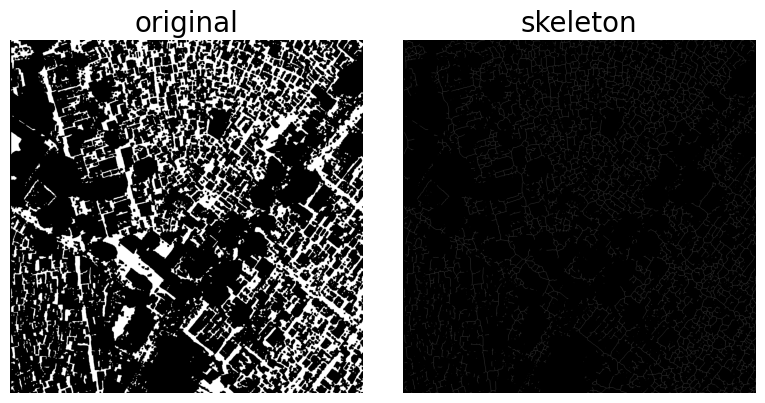

In [17]:
dilation_skeleton = dilation(skeleton, square(1))  # Change square(3) for different thickness
skeleton_uint8 = (skeleton * 255).astype(np.uint8)

# Save the formatted skeleton image
imageio.imsave('skeleton.png', skeleton_uint8)


# display results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4),
                         sharex=True, sharey=True)

ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('original', fontsize=20)

ax[1].imshow(skeleton, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('skeleton', fontsize=20)

fig.tight_layout()
plt.show()

##Path Detection on skeletonize Image

In [ ]:
def skeleton_to_graph2(skeleton):
    # Initialize an empty graph
    G = nx.Graph()

    # Get the dimensions of the skeleton
    rows, cols = skeleton.shape

    # Identify junctions and endpoints
    # Initialize arrays to hold the identified junctions and endpoints
    junctions = set()
    endpoints = set()

    # Define neighbor offsets for connectivity
    neighbors = [(1, 0), (1, 1), (0, 1), (-1, 1), (-1, 0), (-1, -1), (0, -1), (1, -1)]

    # Find junctions and endpoints
    for y in range(rows):
        for x in range(cols):
            if skeleton[y, x] == 1:  # If the pixel is part of the skeleton
                neighbor_count = sum(skeleton[y + dy, x + dx] for dx, dy in neighbors if 0 <= x + dx < cols and 0 <= y + dy < rows)
                if neighbor_count > 2:
                    junctions.add((x, y))
                elif neighbor_count == 1:
                    endpoints.add((x, y))

    # Add junctions and endpoints as nodes
    for junction in junctions:
        G.add_node(junction)
    for endpoint in endpoints:
        G.add_node(endpoint)

    # Define a method to trace a line from an endpoint or junction to another node
    def trace_line(start, end=None):
        x, y = start
        line = [start]
        while True:
            for dx, dy in neighbors:
                nx, ny = x + dx, y + dy
                if (nx, ny) != end and (nx, ny) in line:
                    continue  # Avoid looping back on itself
                if 0 <= nx < cols and 0 <= ny < rows and skeleton[ny, nx] == 1:
                    if (nx, ny) in junctions or (nx, ny) in endpoints:
                        # Reached another node; stop tracing
                        return start, (nx, ny), line
                    elif (nx, ny) not in line:  # Continue tracing
                        line.append((nx, ny))
                        x, y = nx, ny
                        break
            else:
                # No more directions to move
                break
        return start, None, line  # In case of isolated segments, though unlikely

    # Trace lines between endpoints and junctions
    visited = set()
    for start in endpoints.union(junctions):
        if start not in visited:
            _, end, line = trace_line(start)
            if end:
                G.add_edge(start, end)
                visited.update(line)

    return G